## Attention机制

**Attention机制：**Decoder层会将输入的Encoder隐藏层进行softmax计算，然后加权求和，与Decoder输入拼接。这样做的好处是可以将Decoder的每一个时间步都利用与该时间步最相关的Encoder编码信息，这样可以更好地学习到两种语言中对应位置单词的关系。

![seq2seq](./images/seq2seq.svg)
<div align=center>不含Attention机制，Encoder输出隐藏层最后一层向量</div>  


![seq2seq——attention](./images/seq2seq_attention.png)
<div align=center>Attention机制，Encoder输出隐藏层所有时间步向量</div>

## Transformer

要点：
- Self Attention
- Multi-Head Attention
- Positional Embedding
- Add & Layer Normalization
- Encoder and Decoder

相比于seq2seq-Attention，transformer的优势：
* self Attention 取代LSTM，可以实现并发；而且同时处理上下文信息
* 增加了Q,K,V 参数矩阵，使模型具有更强大的表现力
* Multi-Head Attention，并发且可以采集到不同特征

![illustrated transformer](./images/transformer-illustrated.png)

### Encoder 数据流

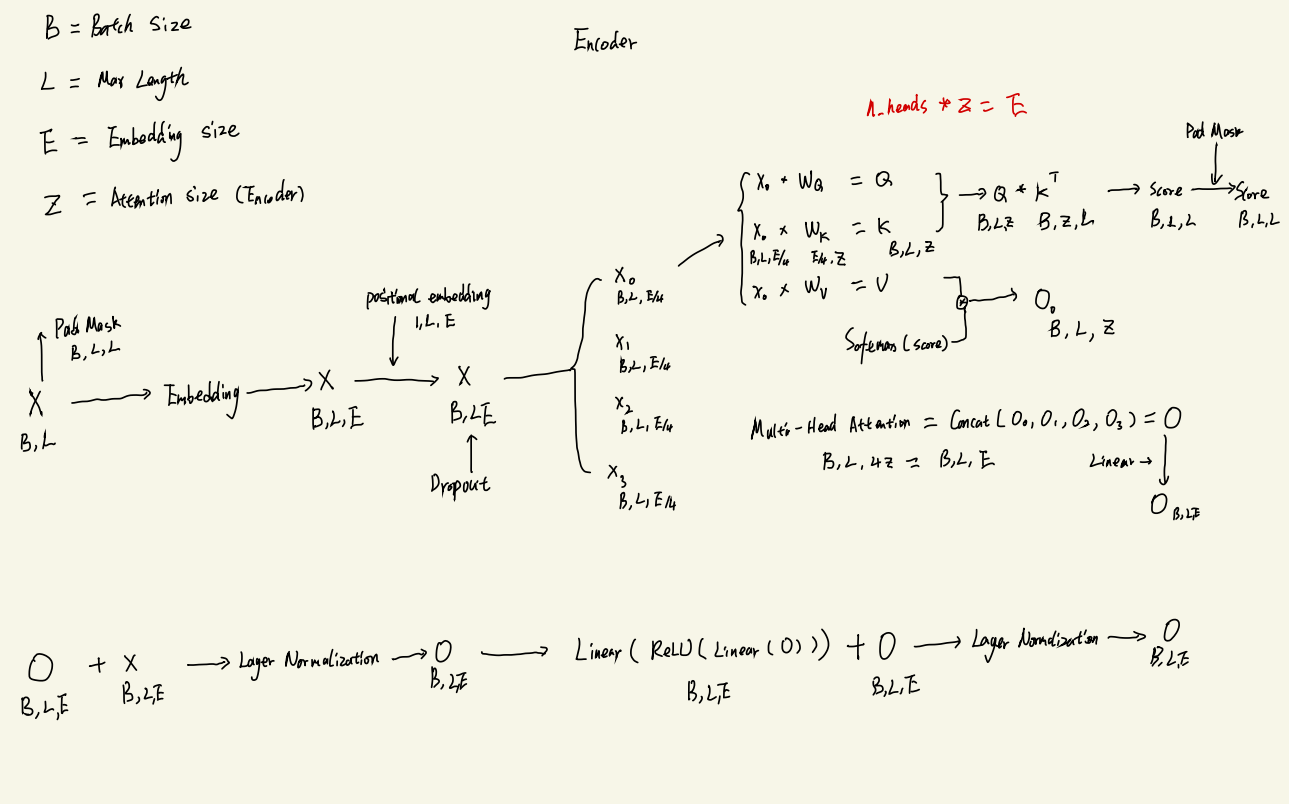

### Decoder数据流

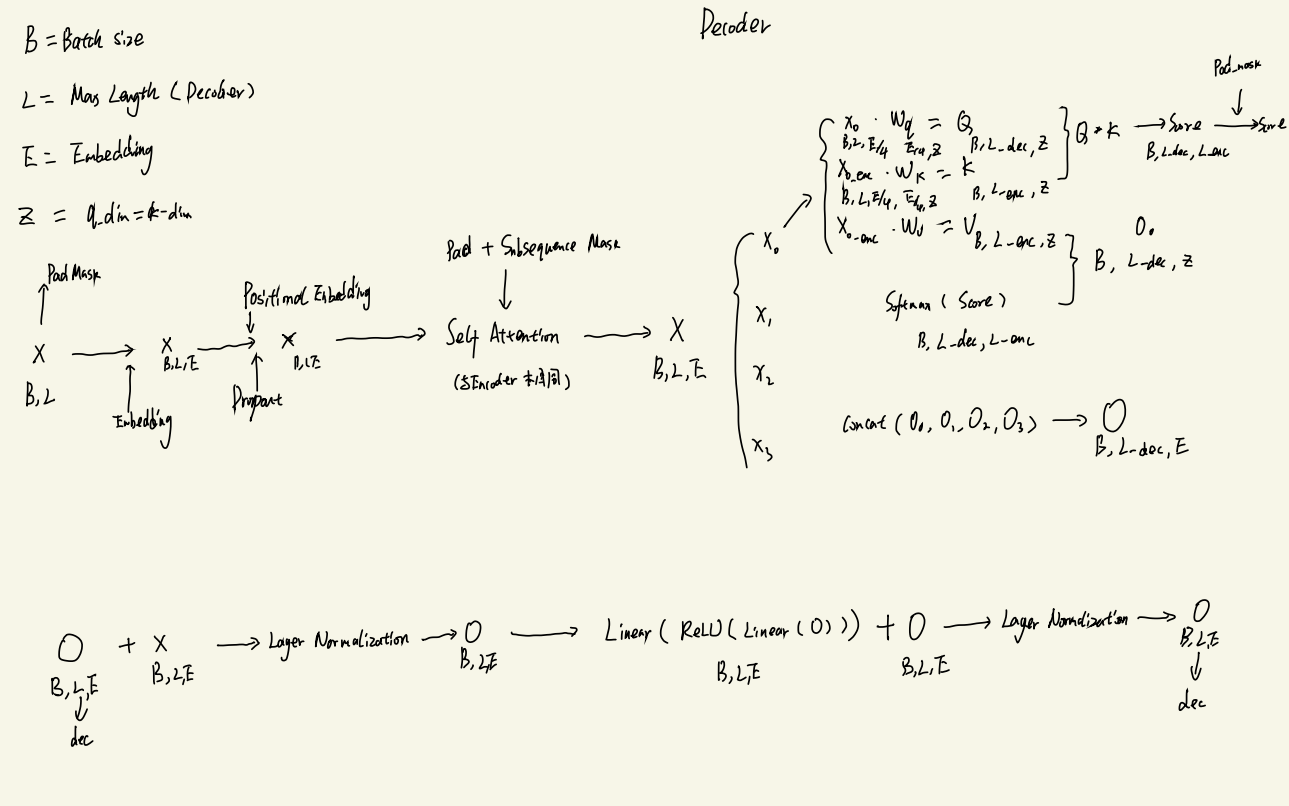

### Transformer代码实现--手动编写Layer
* 生成测试数据
* 初始化超参数
* 初始化模型
* 模型训练
* 预测-BeamSearch  
[代码链接](./Task2-Pytorch_Transformer_with_Custom_Layer.ipynb)

## Transformer问答

### Self-Attention相比于seq2seq的Attention有哪些优点？

### Transformer中的softmax计算为什么需要除以$\sqrt{d_k}$?

### Transformer中attention score计算时候如何mask掉padding位置?

### 为什么Transformer中加入了positional embedding？

### Encoder和Decoder中参数有哪些是一致的？哪些可能不一致？

### Multi-Head Attention 在计算时还是按一个大矩阵计算，跟不是多头有什么区别？优势在哪里？

### Layer Normalization 相比 Batch Normalization的优点是？

### 残差连接的优势是什么？是为了解决什么问题？